In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (Condition on trial type)
#### Load data and check data head
##### Use all.csv

In [2]:
# Load data from csv file into a NumPy structured array
data2C = hddm.load_csv('./rt_dataframes/all.csv')
data2C.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
data2C = data2C.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})

data2C['rt'] = data2C['rt'] / 1000
data2C.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


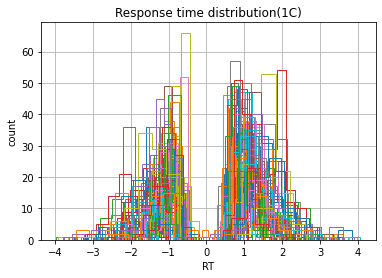

In [4]:
#flip the error RTs to be negative
data2C = hddm.utils.flip_errors(data2C)
# plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(1C)')
for i, subj_data in data2C.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(1C).png')

## Fitting the hierarchical model for one condition with no subject effects

In [9]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data2C, depends_on={'v': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname=f'./fitting_results/HDDM/HDDM2C/traces2c(v_trial).db', db='pickle')
m.save(f'./fitting_results/HDDM/HDDM2C/HDDM2C(v_trial)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1884.2 sec

Plotting a
Plotting a_std
Plotting v(101)
Plotting v(102)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


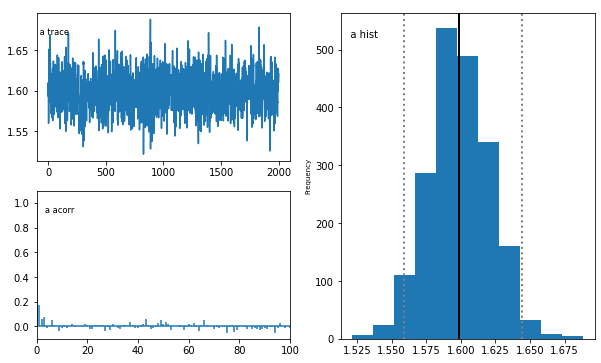

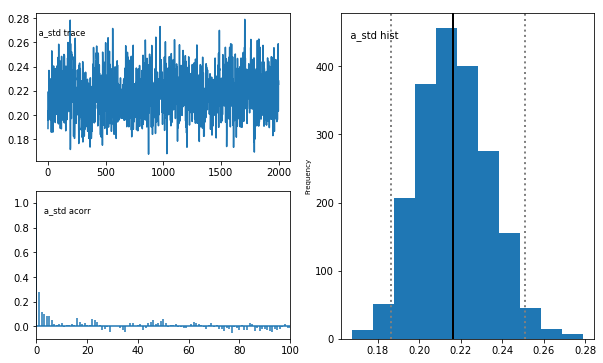

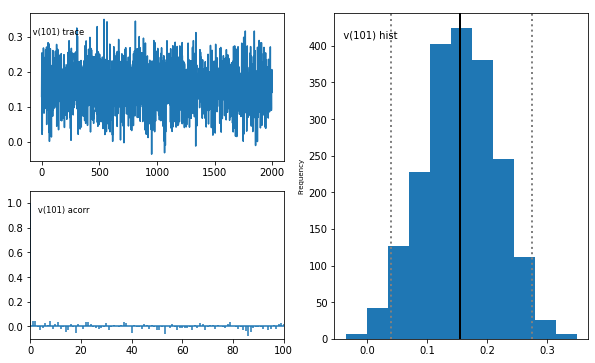

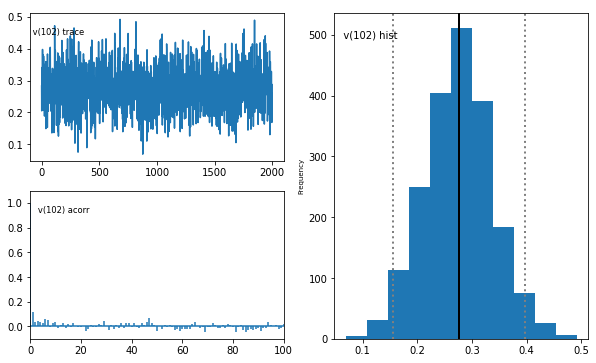

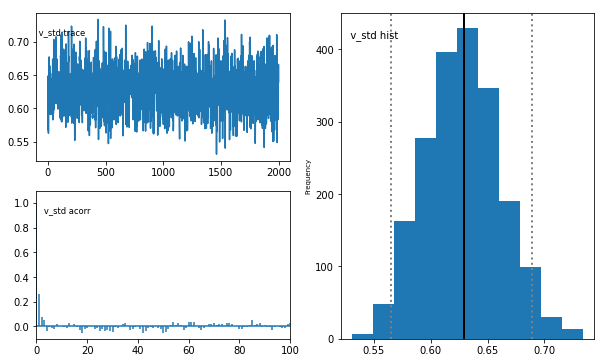

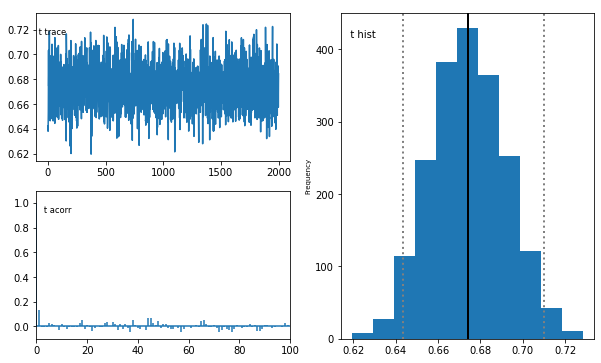

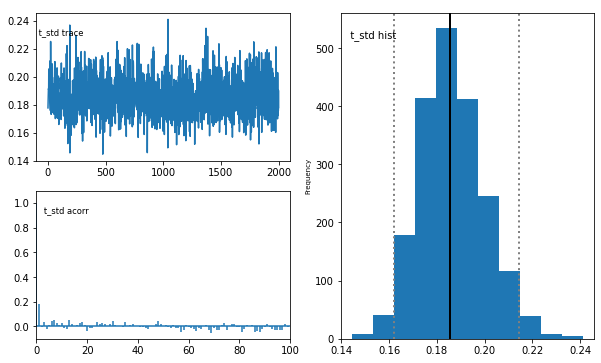

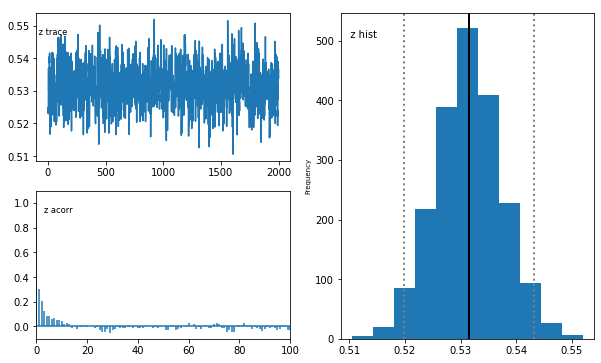

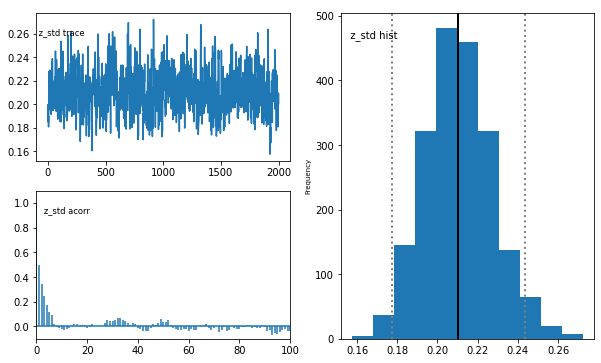

In [10]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [11]:
stats2Cv = m.gen_stats()
stats2Cv[stats2Cv.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.59926,0.0221974,1.55648,1.5847,1.59848,1.61394,1.64229,0.000598751
a_std,0.217138,0.0170382,0.186799,0.205085,0.216134,0.228437,0.251419,0.000595081
v_std,0.628495,0.0329771,0.567333,0.605174,0.629027,0.649949,0.695114,0.000948684
t,0.674381,0.0175488,0.64226,0.66198,0.674114,0.686725,0.709135,0.000443508
t_std,0.186504,0.013502,0.162311,0.177274,0.185693,0.195579,0.215095,0.000378919
z,0.531459,0.00599395,0.519686,0.52755,0.531476,0.535447,0.543127,0.000223843
z_std,0.210765,0.0169552,0.179217,0.199081,0.210015,0.22133,0.245993,0.000692626


## Check for Model convergence

In [12]:
# Set up models list to append results
models2Cv = list()

In [15]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'v': 'trial_type'},include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=100, dbname = f'./fitting_results/HDDM/HDDM2C/chain2Cv_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C/chain2CvCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [16]:
num_chains = 5
data_chains = [(data2C,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2Cv = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0
Fitting chain 1
Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------96%----------------  ] 2895 of 3000 complete in 1871.7 sec              0%                  ] 2 of 3000 complete in 0.7 sec [                  0%                  ] 2 of 3000 complete in 0.7 sec[                  0%                  ] 2 of 3000 complete in 0.7 sec[                  0%                  ] 3 of 3000 complete in 1.4 sec [                  0%                  ] 3 of 3000 complete in 1.4 sec  [                  0%                  ] 3 of 3000 complete in 1.4 sec[                  0%                  ] 3 of 3000 complete in 1.4 sec[                  0%                  ] 4 of 3000 complete in 2.0 sec[                  0%                  ] 4 of 3000 complete in 2.1 sec  [                  0%                  ] 4 of 3000 complete in 2.1 sec[                  0%                  ] 4 of 3000 complete in 2.1 sec[                  0%                  ] 4 of 3000 complete in 2.1 sec[                  0%                  ] 5 of 3000 complete in 2.7 sec[            